# Data Scientist Associate Case Study

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 
import pandas as pd
data = pd.read_csv("data/fitness_class.csv")
data.head(6)

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7
5,Tue,PM,HIIT,15,4,7,28.7,4,7


In [2]:
data.isnull().sum()

day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64

In [3]:
data.dtypes

day_of_week        object
time               object
class_category     object
class_capacity      int64
days_before         int64
attendance          int64
age               float64
new_students        int64
over_6_month        int64
dtype: object

### day_of_week

In [4]:
data.day_of_week.unique()

array(['Wed', 'Sun', 'Mon', 'Tue', 'Thu', 'Sat', 'Fri'], dtype=object)

### time

In [5]:
data.time.unique()

array(['AM', 'PM'], dtype=object)

### class_category    

In [6]:
data.class_category.unique()

array(['Yoga', 'Aqua', 'Strength', 'HIIT', 'Cycling'], dtype=object)

### class_capacity    

In [7]:
data.class_capacity.unique()

array([15, 25, 26], dtype=int64)

In [8]:
data.replace({'class_capacity':{26:25}}, inplace = True)

### days_before  

In [9]:
data.days_before.unique()

array([1, 3, 5, 4, 2], dtype=int64)

### attendance        

In [10]:
data.attendance.unique()

array([ 8, 10, 18,  7, 15, 20,  5, 12,  9,  6, 19, 13, 11,  4, 16, 14, 21,
       17], dtype=int64)

In [11]:
data.attendance.describe()

count    765.000000
mean       9.563399
std        3.896598
min        4.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       21.000000
Name: attendance, dtype: float64

### age               

In [12]:
data.age.unique()

array([31.1, 27. , 22.4, 23.5, 29.8, 28.7, 32.5, 36. , 15.3, 31.3, 23.8,
       30.3, 29.2, 21.8, 34.7, 34.4, 30.9, 38.9, 18.7, 32.8, 29.7, 30.6,
       30. , 34. , 32.3, 31.6, 32. , 24.5, 24.6, 34.1, 21.6, 33.8, 27.2,
       17.7, 33. , 24.7, 40.2, 23.1, 35.2, 27.3, 25.8, 14.8, 33.5, 31.9,
       21. , 16.4, 27.8, 26.6, 31.7, 39.1,  8.3, 28.1, 26.2, 19.9, 28.6,
       30.8, 23. , 31.8, 32.2, 37.3, 34.2, 35.7, 34.6, 39.3, 35.8, 27.5,
       40.1, 20.9, 28.2, 26.1, 20.5, 21.5, 24.3, 40.4, 19.6, 32.9, 26.5,
       14. , 30.5, 22. , 26.4, 31. , 22.5, 21.4, 40.7, 33.7, 28. , 29. ,
       13.6, 22.7, 27.4, 25.2, 33.3, 25. , 25.6, 31.5, 30.7, 25.3, 17.5,
       29.4, 22.6, 39. , 25.1, 32.4, 37.5, 44. , 36.2, 24.2, 26.3, 20. ,
       36.6, 18. , 25.4, 28.3, 35.1, 43.7, 35. , 40.6, 35.4, 25.9, 26. ,
       24. , 19.5, 11.3, 27.9, 26.7, 34.3, 31.2, 15.9, 28.5, 24.8, 37.6,
       17.2, 26.8, 29.3, 37.1, 22.1, 41.1, 16.3, 18.1, 28.8, 27.6, 21.3,
       42.4, 25.5, 20.7, 28.4, 24.1, 29.9, 25.7, 31

In [13]:
data = data[data.age >= 14 ]

In [14]:
data.age.describe()

count    762.000000
mean      29.163648
std        5.812547
min       14.000000
25%       25.300000
50%       29.000000
75%       33.200000
max       48.800000
Name: age, dtype: float64

### new_students      

In [15]:
data.new_students.unique()

array([ 6,  7,  8,  5,  4,  3,  2,  9, 10, 11,  1], dtype=int64)

In [16]:
data.new_students.describe()

count    762.000000
mean       5.912073
std        1.788821
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       11.000000
Name: new_students, dtype: float64

### over_6_month      

In [17]:
data.over_6_month.unique()

array([ 4,  8,  7,  9, 11,  6,  5,  3, 12, 10, 13,  2], dtype=int64)

In [18]:
data.over_6_month.describe()

count    762.000000
mean       7.565617
std        1.968617
min        2.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       13.000000
Name: over_6_month, dtype: float64

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 


I followed the the instructions in dataset table. I have deleted rows where average age wa below 14 and updated rows with wrong class capacity. Rest of column I left unmodified since i found them consistent with description.

In [19]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 

In [20]:
data.corr()

,class_capacity,days_before,attendance,age,new_students,over_6_month
class_capacity,1.000000,0.349715,0.650586,-0.437761,0.265591,0.438616
days_before,0.349715,1.000000,0.272084,-0.213646,0.142320,0.183220
attendance,0.650586,0.272084,1.000000,-0.734209,0.463347,0.694935
age,-0.437761,-0.213646,-0.734209,1.000000,-0.375154,-0.568190
new_students,0.265591,0.142320,0.463347,-0.375154,1.000000,0.360801
over_6_month,0.438616,0.183220,0.694935,-0.568190,0.360801,1.000000


Since the task is to predict attendance I will focus my attention on realtionship target variable with others.

<AxesSubplot:xlabel='over_6_month', ylabel='Count'>

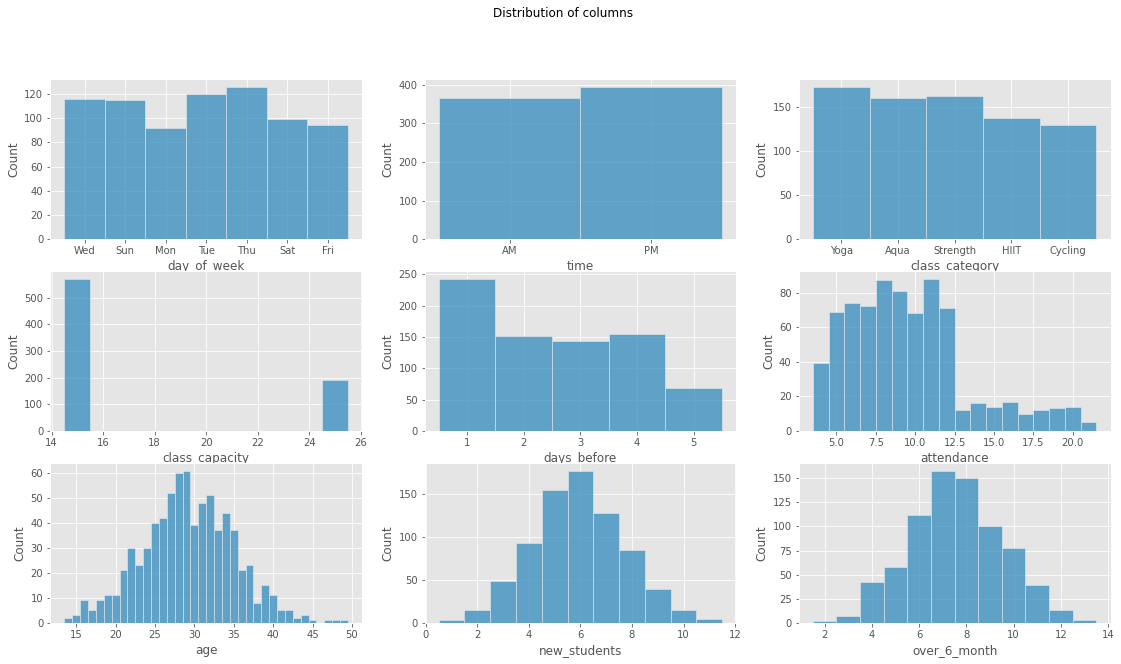

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

fig, ax = plt.subplots(3,3,figsize=(19,10))
fig.suptitle('Distribution of columns')

sns.histplot(data, x ='day_of_week', discrete=True, ax = ax[0,0])
sns.histplot(data, x ='time', discrete=True, ax = ax[0,1])
sns.histplot(data, x ='class_category', discrete=True, ax = ax[0,2])

sns.histplot(data, x ='class_capacity', discrete=True, ax = ax[1,0])
sns.histplot(data, x ='days_before', discrete=True, ax = ax[1,1])
sns.histplot(data, x ='attendance', discrete=True, ax = ax[1,2])

sns.histplot(data, x ='age', discrete=True, ax = ax[2,0])
sns.histplot(data, x ='new_students', discrete=True, ax = ax[2,1])
sns.histplot(data, x ='over_6_month', discrete=True, ax = ax[2,2])

In [22]:
print(f'Skewness of attendance: {data.attendance.skew()}')

Skewness of attendance: 0.9040706775256089


Text(0.5, 1.0, 'class_category - attendance relationship')

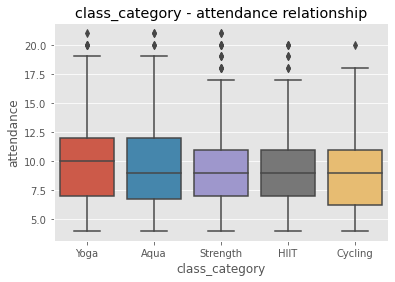

In [49]:
sns.boxplot(x = 'class_category', y = 'attendance', data = data)
plt.title('class_category - attendance relationship')

In [24]:
import numpy as np
data.groupby('class_category')['attendance'].agg([np.mean,np.median,np.min, np.max,np.std])

,mean,median,amin,amax,std
class_category,,,,,
Aqua,9.537500,9,4,21,4.004538
Cycling,9.130769,9,4,20,3.444777
HIIT,9.306569,9,4,20,3.709214
Strength,9.691358,9,4,21,4.069709
Yoga,9.803468,10,4,21,3.861948


Text(0.5, 1.0, 'Age - attendance relationship')

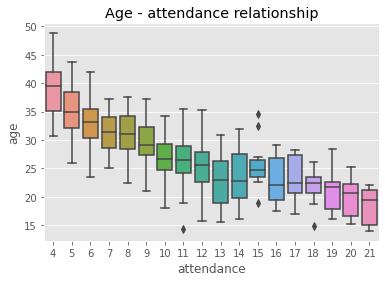

In [50]:
sns.boxplot(x = 'attendance', y = 'age', data = data)
plt.title('Age - attendance relationship')

Text(0.5, 1.0, 'class_capacity - attendance relationship')

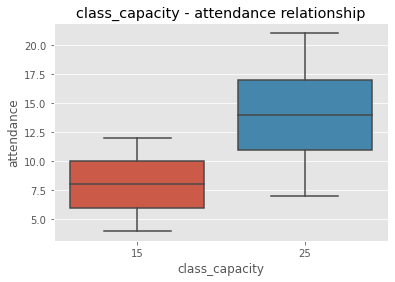

In [51]:
sns.boxplot(y = 'attendance', x = 'class_capacity', data = data)
plt.title('class_capacity - attendance relationship')

In [27]:
data.groupby('class_capacity')['attendance'].agg([np.mean,np.median,np.min, np.max,np.std])

,mean,median,amin,amax,std
class_capacity,,,,,
15,8.075306,8,4,12,2.454413
25,13.837696,14,7,21,4.001295


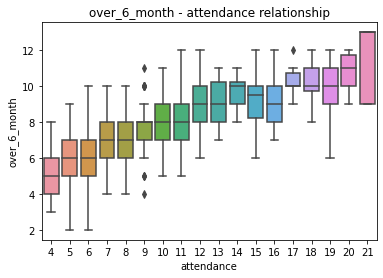

In [28]:
sns.boxplot(x = 'attendance', y = 'over_6_month', data = data)
plt.title('over_6_month - attendance relationship');

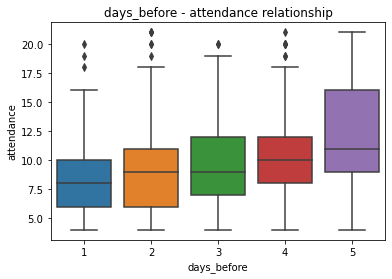

In [29]:
sns.boxplot(y = 'attendance', x = 'days_before', data = data)
plt.title('days_before - attendance relationship');

In [30]:
data.groupby('days_before')['attendance'].agg([np.mean,np.median,np.min, np.max,np.std])

,mean,median,amin,amax,std
days_before,,,,,
1,8.271605,8,4,20,2.867655
2,9.526316,9,4,21,3.921325
3,9.622378,9,4,20,3.946480
4,10.180645,10,4,21,3.835025
5,12.202899,11,4,21,4.689098


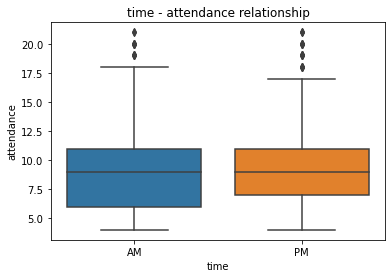

In [31]:
sns.boxplot(y = 'attendance', x = 'time', data = data)
plt.title('time - attendance relationship');

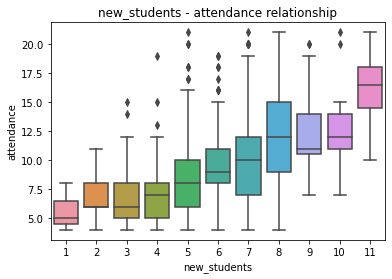

In [32]:
sns.boxplot(y = 'attendance', x = 'new_students', data = data)
plt.title('new_students - attendance relationship');

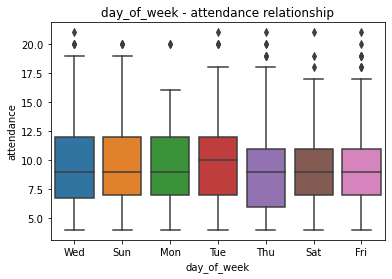

In [33]:
sns.boxplot(y = 'attendance', x = 'day_of_week', data = data)
plt.title('day_of_week - attendance relationship');

In [34]:
cat_var = ['day_of_week','time','class_category','class_capacity','days_before']
num_var = ['age','attendance','new_students','over_6_month']

data_prepared= pd.get_dummies(data, columns = cat_var)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaled = pd.DataFrame(scaler.fit_transform(data[num_var].to_numpy()), columns = num_var)
data_prepared[num_var] = scaled

In [36]:
data_prepared.dropna(inplace=True)

In [37]:
data_prepared.head(2)

,attendance,age,new_students,over_6_month,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,...,class_category_HIIT,class_category_Strength,class_category_Yoga,class_capacity_15,class_capacity_25,days_before_1,days_before_2,days_before_3,days_before_4,days_before_5
0,-0.529412,-0.017241,2.220446e-16,-0.636364,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,-0.529412,-0.252874,2.000000e-01,0.090909,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*

- First, the distribution of attendance shows a right skew with strong drop around 12. The rest of the columns have a uniform or normal distribution.
- There are no noticeable differences in attendance between classes.
- In the graph of age and attendance, one can see the relationship between average age and attendance. The lower the average age, the higher the attendance. 
- The graph of class size shows that the average attendance of larger groups is higher by five but also the bigger is standard deviation.
- You can see a higher attendance in groups with more people who have been attending classes for 6 months.
- There seems to be a weak correlation between presence and days-before column.
- The timing of the classes is irrelevant.
- The number of new students in the class results in higher attendance.
- The day of class is also irrelevant.

I have also dummy encoded categorical variables and scaled numerical ones. Now i'm storring prepared for modelling dataset in varible called **data_prepared**

In [38]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [40]:
algorithms = [['gradient_boost_reg',GradientBoostingRegressor()],['SGDREG',SGDRegressor()],["SVR",SVR()],["BsyRidge",BayesianRidge()],["LR",LinearRegression()],["XGBReg",XGBRegressor()],["CatBoostReg",CatBoostRegressor()]]

In [52]:
score = []
name_list = [] 

def train_predict_save_metrics(algorithms_list,dataset):
    x = dataset.iloc[:,1:]
    y =  dataset.iloc[:,0]
    kfold = KFold(n_splits=10,shuffle=True, random_state=42)
    for name, alg in algorithms_list:
        cv_results = cross_val_score(alg, x, y, cv=kfold, scoring='neg_root_mean_squared_error')
        score.append(cv_results)
        name_list.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)

In [53]:
train_predict_save_metrics(algorithms,data_prepared)

Learning rate set to 0.038549
0:	learn: 0.4430245	total: 1.43ms	remaining: 1.43s
1:	learn: 0.4339998	total: 2.82ms	remaining: 1.41s
2:	learn: 0.4255895	total: 4.17ms	remaining: 1.39s
3:	learn: 0.4176684	total: 5.45ms	remaining: 1.36s
4:	learn: 0.4096146	total: 6.73ms	remaining: 1.34s
5:	learn: 0.4014921	total: 7.87ms	remaining: 1.3s
6:	learn: 0.3943792	total: 9.19ms	remaining: 1.3s
7:	learn: 0.3878263	total: 10.9ms	remaining: 1.35s
8:	learn: 0.3815398	total: 12.4ms	remaining: 1.37s
9:	learn: 0.3749293	total: 13.9ms	remaining: 1.37s
10:	learn: 0.3692485	total: 15.4ms	remaining: 1.38s
11:	learn: 0.3639626	total: 16.9ms	remaining: 1.39s
12:	learn: 0.3577774	total: 18.2ms	remaining: 1.38s
13:	learn: 0.3528729	total: 19.5ms	remaining: 1.38s
14:	learn: 0.3482156	total: 20.8ms	remaining: 1.37s
15:	learn: 0.3429504	total: 22.1ms	remaining: 1.36s
16:	learn: 0.3384777	total: 23.4ms	remaining: 1.35s
17:	learn: 0.3349449	total: 24.8ms	remaining: 1.35s
18:	learn: 0.3308125	total: 26.2ms	remaining: 

In [62]:
mean_score_algorithms = {name_list[x]: score[x].mean() for x in range(len(name_list))}
std_score_algorithms = {name_list[x]: score[x].std() for x in range(len(name_list))}

In [66]:
mean_score_algorithms

{'gradient_boost_reg': -0.2692764715023373,
 'SGDREG': -0.26536998060637773,
 'SVR': -0.28334617463646194,
 'BsyRidge': -0.26227821532852097,
 'LR': -0.26324453603528675,
 'XGBReg': -0.30814480437405556,
 'CatBoostReg': -0.2790227588845916}

In [67]:
std_score_algorithms

{'gradient_boost_reg': 0.030078377375725808,
 'SGDREG': 0.030710127187646295,
 'SVR': 0.03945217727386107,
 'BsyRidge': 0.026743746530601256,
 'LR': 0.02651932903295248,
 'XGBReg': 0.020735158531820477,
 'CatBoostReg': 0.03315458601753162}

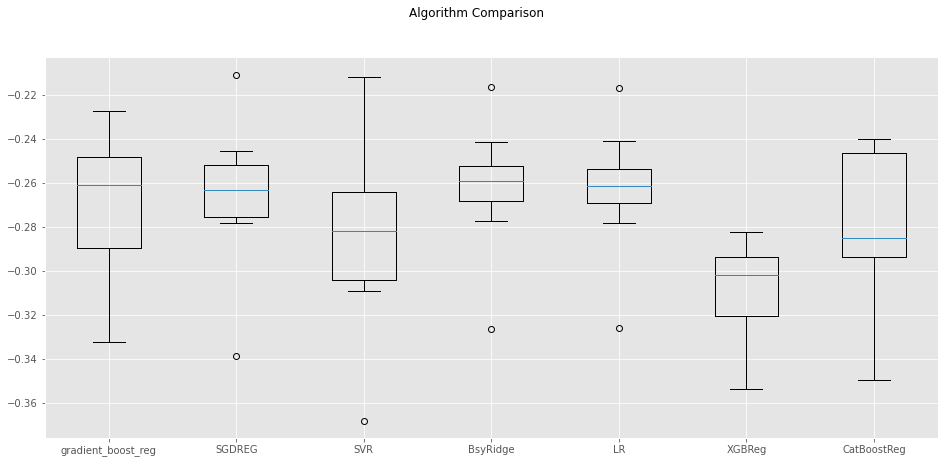

In [74]:
fig = plt.figure(figsize = [16,7])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(score)
ax.set_xticklabels(name_list)
plt.show()

In [71]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit


gbr = GradientBoostingRegressor()
cv = ShuffleSplit(n_splits=30, test_size=0.2) 

n_estimators = [50,100,150,200,250,350,500,800]
train_scores, test_scores = validation_curve(
    gbr, data_prepared.iloc[:,1:], data_prepared.attendance, param_name="n_estimators", param_range=n_estimators,
    cv=cv, scoring="neg_root_mean_squared_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

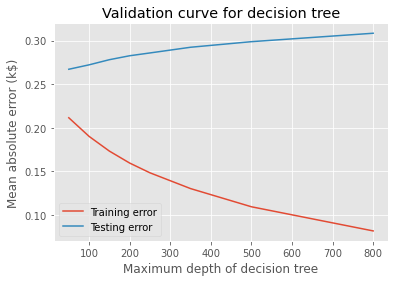

In [72]:
plt.plot(n_estimators, train_errors.mean(axis=1), label="Training error")
plt.plot(n_estimators, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("neg_root_mean_squared_error (k$)")
_ = plt.title("Validation curve for decision tree")

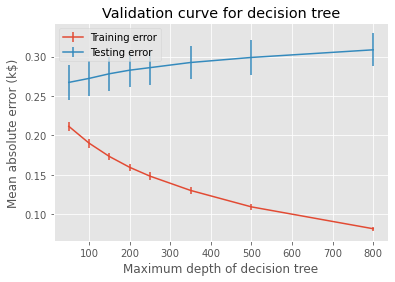

In [73]:
plt.errorbar(n_estimators, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(n_estimators, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [93]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(gbr, data_prepared.iloc[:,1:], data_prepared.attendance, cv=10,
                                                        scoring='neg_root_mean_squared_error', random_state=42)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

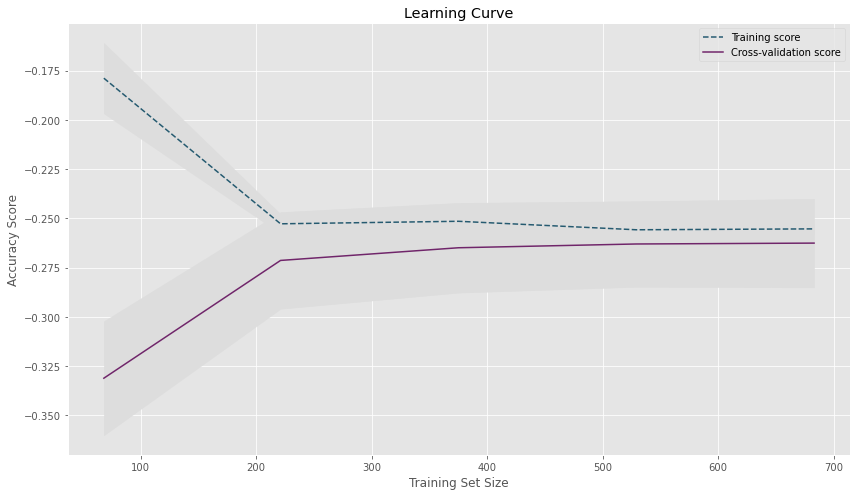

In [98]:
plt.subplots(1, figsize=(12,7))
plt.plot(train_sizes, train_mean, '--', color="#255a70",  label="Training score")
plt.plot(train_sizes, test_mean, color="#70256a", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*

In [47]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study